In [3]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
#matplotlib.style.use('ggplot')

import genutils
import os
import sys
import numpy as np
import re
import scipy 
import matplotlib.patches as patches


/home/jmkidd/kidd-lab/progs/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
inDir = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/MAF_Calculation/'

#The MAF distributions will need to be calculated for the wolves AND village dogs on the X and autosomes separately.
#Can be merged later if needed
canineTypes = ['wolves','villagedogs']
SNPTypes = ['TotalSNPs','NWWSNPs_NWWrm']#NWWSNPs']
chromTypes = ['Autosomes','X']


In [13]:
###VERY VERY LONG AND SLOW###
MAFarray = []

for s in SNPTypes:
    snp = s
    for c in canineTypes:
        canine = c
        for d in chromTypes:
            Chrom = d
            inFile = open(inDir + snp + '/' + canine + '/' + Chrom + '/' + 'plink.frq', 'r')
            lineCount = 0
            for line in inFile:
                lineCount += 1
                if 'CHR' in line: #skips header
                    continue
                line = line.rstrip().strip().split()
                MAF = float(line[4])
                MAFarray.append([snp,canine,Chrom,MAF])
print '%i values in MAF array' % (len(MAFarray))

20154094 values in MAF array


In [14]:
#Save full MAF array into a pandas dataframe
df = pd.DataFrame(MAFarray,columns=['SNP','Canine','Chrom','MAF'])

print df.head()

         SNP  Canine      Chrom   MAF
0  TotalSNPs  wolves  Autosomes  0.00
1  TotalSNPs  wolves  Autosomes  0.00
2  TotalSNPs  wolves  Autosomes  0.05
3  TotalSNPs  wolves  Autosomes  0.10
4  TotalSNPs  wolves  Autosomes  0.00


In [15]:
wolf_Tot_Auto_Df = df.loc[df['Canine'] == 'wolves'].loc[df['SNP']=='TotalSNPs'].loc[df['Chrom'] == 'Autosomes']
dog_Tot_Auto_Df = df.loc[df['Canine'] == 'villagedogs'].loc[df['SNP']=='TotalSNPs'].loc[df['Chrom'] == 'Autosomes']

wolfMed = wolf_Tot_Auto_Df['MAF'].median()
wolfMean = wolf_Tot_Auto_Df['MAF'].mean()
print 'Median WOLF MAF from Autosomal Total SNPs: ', wolfMed
print 'Mean WOLF MAF from Autosomal Total SNPs: ', wolfMean
print '%i SNPs in WOLF Autosomal Total SNPs' % len(wolf_Tot_Auto_Df)
dogMed = dog_Tot_Auto_Df['MAF'].median()
dogMean = dog_Tot_Auto_Df['MAF'].mean()
print 'Median DOG MAF from Autosomal Total SNPs: ', dogMed
print 'Mean DOG MAF from Autosomal Total SNPs: ', dogMean
print '%i SNPs in Dog Autosomal Total SNPs' % len(dog_Tot_Auto_Df)


Median WOLF MAF from Autosomal Total SNPs:  0.1
Mean WOLF MAF from Autosomal Total SNPs:  0.134323809627
7262718 SNPs in WOLF Autosomal Total SNPs
Median DOG MAF from Autosomal Total SNPs:  0.03488
Mean DOG MAF from Autosomal Total SNPs:  0.104787479506
7262718 SNPs in Dog Autosomal Total SNPs


In [16]:
wolf_Tot_X_Df = df.loc[df['Canine'] == 'wolves'].loc[df['SNP']=='TotalSNPs'].loc[df['Chrom'] == 'X']
dog_Tot_X_Df = df.loc[df['Canine'] == 'villagedogs'].loc[df['SNP']=='TotalSNPs'].loc[df['Chrom'] == 'X']

wolfMed = wolf_Tot_X_Df['MAF'].median()
wolfMean = wolf_Tot_X_Df['MAF'].mean()
print 'Median WOLF MAF from chrX Total SNPs: ', wolfMed
print 'Mean WOLF MAF from chrX Total SNPs: ', wolfMean
print '%i SNPs in WOLF chrX Total SNPs' % len(wolf_Tot_X_Df)
dogMed = dog_Tot_X_Df['MAF'].median()
dogMean = dog_Tot_X_Df['MAF'].mean()
print 'Median DOG MAF from chrX Total SNPs: ', dogMed
print 'Mean DOG MAF from chrX Total SNPs: ', dogMean
print '%i SNPs in WOLF chrX Total SNPs' % len(dog_Tot_X_Df)


Median WOLF MAF from chrX Total SNPs:  0.1
Mean WOLF MAF from chrX Total SNPs:  0.132966857272
53164 SNPs in WOLF chrX Total SNPs
Median DOG MAF from chrX Total SNPs:  0.01163
Mean DOG MAF from chrX Total SNPs:  0.055350332744
53164 SNPs in WOLF chrX Total SNPs


In [17]:
wolf_NWW_Auto_Df = df.loc[df['Canine'] == 'wolves'].loc[df['SNP']=='NWWSNPs_NWWrm'].loc[df['Chrom'] == 'Autosomes']
dog_NWW_Auto_Df = df.loc[df['Canine'] == 'villagedogs'].loc[df['SNP']=='NWWSNPs_NWWrm'].loc[df['Chrom'] == 'Autosomes']

wolfMed = wolf_NWW_Auto_Df['MAF'].median()
wolfMean = wolf_NWW_Auto_Df['MAF'].mean()
print 'Median WOLF MAF from Autosome NWW SNPs: ', wolfMed
print 'Mean WOLF MAF from Autosome NWW SNPs: ', wolfMean
print '%i SNPs in WOLF chrX NWW SNPs' % len(wolf_NWW_Auto_Df)

dogMed = dog_NWW_Auto_Df['MAF'].median()
dogMean = dog_NWW_Auto_Df['MAF'].mean()
print 'Median DOG MAF from Autosome NWW SNPs: ', dogMed
print 'Mean DOG MAF from Autosome NWW SNPs: ', dogMean
print '%i SNPs in WOLF Autosome NWW SNPs' % len(dog_NWW_Auto_Df)


Median WOLF MAF from Autosome NWW SNPs:  0.1429
Mean WOLF MAF from Autosome NWW SNPs:  0.187241497226
2743314 SNPs in WOLF chrX NWW SNPs
Median DOG MAF from Autosome NWW SNPs:  0.0814
Mean DOG MAF from Autosome NWW SNPs:  0.142019732965
2743314 SNPs in WOLF Autosome NWW SNPs


In [18]:
wolf_NWW_X_Df = df.loc[df['Canine'] == 'wolves'].loc[df['SNP']=='NWWSNPs_NWWrm'].loc[df['Chrom'] == 'X']
dog_NWW_X_Df = df.loc[df['Canine'] == 'villagedogs'].loc[df['SNP']=='NWWSNPs_NWWrm'].loc[df['Chrom'] == 'X']

wolfMed = wolf_NWW_X_Df['MAF'].median()
wolfMean = wolf_NWW_X_Df['MAF'].mean()
print 'Median WOLF MAF from chrX NWW SNPs: ', wolfMed
print 'Mean WOLF MAF from chrX NWW SNPs: ', wolfMean
print '%i SNPs in WOLF chrX MWW SNPs' % len(wolf_NWW_X_Df)

dogMed = dog_NWW_X_Df['MAF'].median()
dogMean = dog_NWW_X_Df['MAF'].mean()
print 'Median DOG MAF from chrX NWW SNPs: ', dogMed
print 'Mean DOG MAF from chrX NWW SNPs: ', dogMean
print '%i SNPs in WOLF chrX NWW SNPs' % len(dog_NWW_X_Df)


Median WOLF MAF from chrX NWW SNPs:  0.2
Mean WOLF MAF from chrX NWW SNPs:  0.212038541258
17851 SNPs in WOLF chrX MWW SNPs
Median DOG MAF from chrX NWW SNPs:  0.0
Mean DOG MAF from chrX NWW SNPs:  0.0528545672511
17851 SNPs in WOLF chrX NWW SNPs


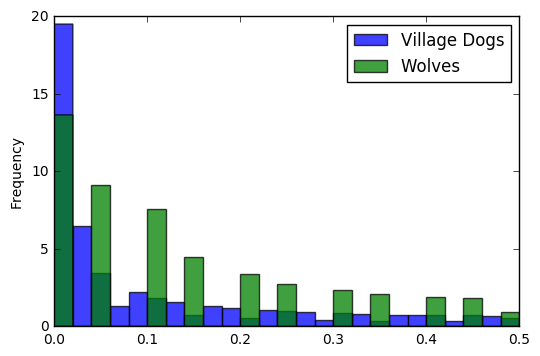

In [ ]:
#TOTAL SNPS = AUTOSOMES
DF = pd.DataFrame({'Wolves': wolf_Tot_Auto_Df['MAF'], 'Village Dogs': dog_Tot_Auto_Df['MAF']})
myPlot = DF.plot(kind='hist', bins=25,xlim=[0,0.5],alpha=0.75, normed = True)
myPlot.set_xlabel('Minor Allele Frequency (MAF)')
myPlot.set_title('Autosomes - Total SNP Set')

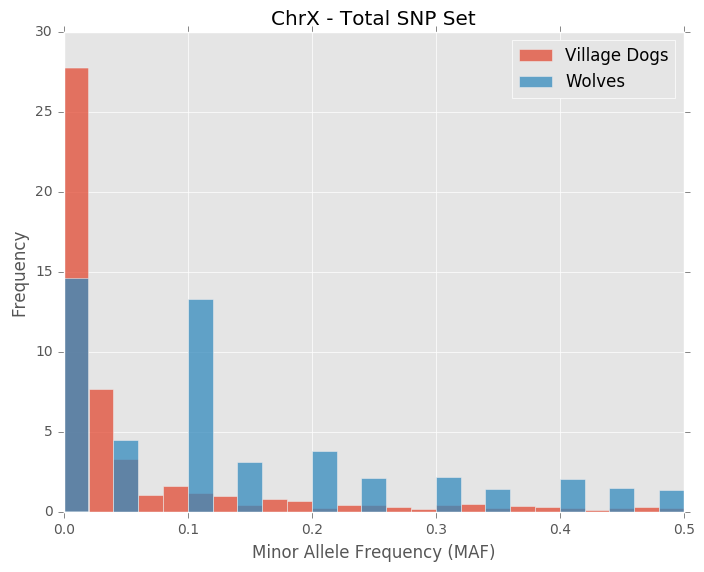

In [59]:
#TOTAL SNPS = X CHROM
DF = pd.DataFrame({'Wolves': wolf_Tot_X_Df['MAF'], 'Village Dogs': dog_Tot_X_Df['MAF']})
myPlot = DF.plot(kind='hist', bins=25,xlim=[0,0.5],alpha=0.75, normed = True)
myPlot.set_xlabel('Minor Allele Frequency (MAF)')
myPlot.set_title('ChrX - Total SNP Set')

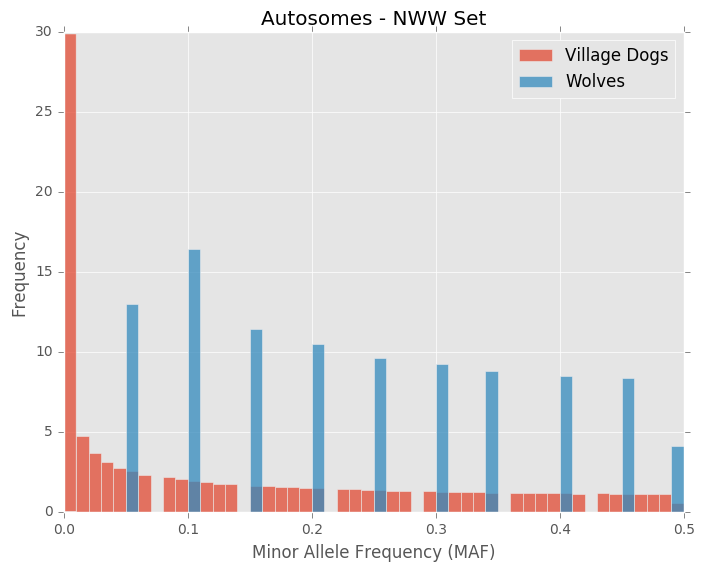

In [61]:
#NWW SNPS = AUTOSOMES
DF = pd.DataFrame({'Wolves': wolf_NWW_Auto_Df['MAF'], 'Village Dogs': dog_NWW_Auto_Df['MAF']})
myPlot = DF.plot(kind='hist', bins=50,xlim=[0,0.5],alpha=0.75, normed = True)
myPlot.set_xlabel('Minor Allele Frequency (MAF)')
myPlot.set_title('Autosomes - NWW Set')

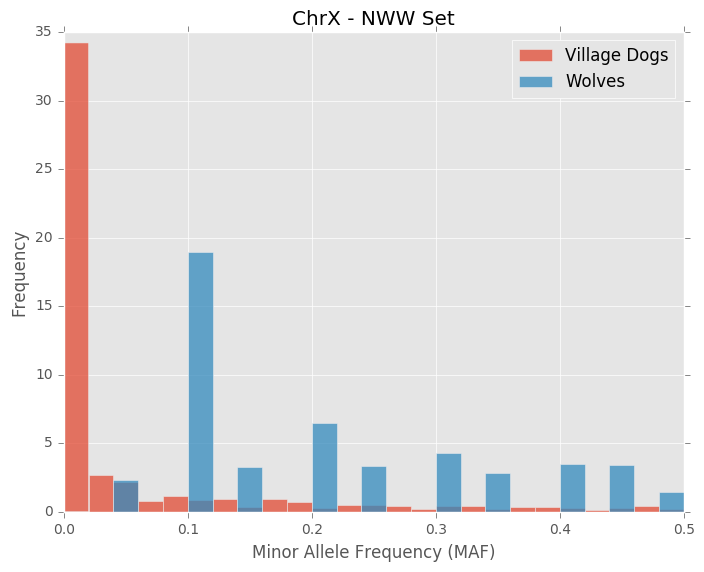

In [62]:
#NWW SNPS = chrX
DF = pd.DataFrame({'Wolves': wolf_NWW_X_Df['MAF'], 'Village Dogs': dog_NWW_X_Df['MAF']})
myPlot = DF.plot(kind='hist', bins=25,xlim=[0,0.5],alpha=0.75, normed = True)
myPlot.set_xlabel('Minor Allele Frequency (MAF)')
myPlot.set_title('ChrX - NWW Set')